In [1]:
import os
import numpy as np

from pydiva import pydiva2d
# import pydiva4d

from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
%matplotlib inline

divadir = '/home/janjaapmeijer/Checkouts/DIVA/'
figdir = '/home/janjaapmeijer/Pictures/BlackSea/'
if not os.path.exists(figdir):
    os.makedirs(figdir)



In [2]:
DivaDirs = pydiva2d.DivaDirectories(divadir)
DivaFiles = pydiva2d.Diva2Dfiles(DivaDirs.diva2d)

# paramfile = DivaFiles.parameter
# coastfile = DivaFiles.contour
# datafile = DivaFiles.data

datadir = '/home/janjaapmeijer/Checkouts/DivaPythonTools/data/'
datafile = os.path.join(datadir, 'MLD1.dat')
coastfile = os.path.join(datadir, 'coast.cont')
paramfile = os.path.join(datadir, 'param.par')

Data = pydiva2d.Diva2DData().read_from(datafile)
Contour = pydiva2d.Diva2DContours().read_from(coastfile)
Param = pydiva2d.Diva2DParameters().read_from(paramfile)

In [3]:
Param.describe()

Correlation length: 1.0
icoordchange: 2
ispec: -101
ireg: 2
Domain: x-axis: from 27.0 to 42.0 with 151 steps of 0.1
Domain: y-axis: from 40.0 to 47.5 with 76 steps of 0.1
Exclusion value: -99.0
Signal-to-noise ratio: 1.0
Variance of the background field: 1.0


In [4]:
Param.ispec = -101
Param.varbak = 1.0
Param.write_to(paramfile)
paramfile

'/home/janjaapmeijer/Checkouts/DivaPythonTools/data/param.par'

In [5]:
analysis2d = pydiva2d.Diva2DResults().make(divadir, datafile=datafile,
                                           contourfile=coastfile,
                                           paramfile=paramfile)
mesh2d = pydiva2d.Diva2DMesh().read_from(DivaFiles.mesh, DivaFiles.meshtopo)
mesh2d.describe()



Number of nodes: 6447
Number of interfaces: 14059
Number of elements: 7592


In [6]:
m = Basemap(projection='merc', llcrnrlon=Param.xori, llcrnrlat=Param.yori, 
            urcrnrlon=Param.xend, urcrnrlat=Param.yend, resolution='i')

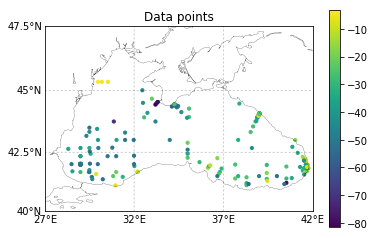

In [7]:


fig = plt.figure()
ax = plt.subplot(111)
m.ax = ax
dataplot = Data.add_to_plot(m=m, s=10)
m.drawmeridians(np.linspace(Param.xori, Param.xend, 4), labels=[0, 0, 0, 1], linewidth=0.2)
m.drawparallels(np.linspace(Param.yori, Param.yend, 4), labels=[1, 0, 0, 0], linewidth=0.2)
m.drawcoastlines(linewidth=0.2)
plt.colorbar(dataplot)
plt.title('Data points')
# plt.savefig(os.path.join(figdir, 'datapoints.png'))
plt.show()
plt.close()





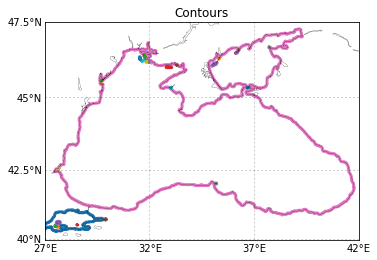

In [8]:


fig = plt.figure()
ax = plt.subplot(111)
m.ax = ax
Contour.add_to_plot(m=m, linewidth=3)
m.drawmeridians(np.linspace(Param.xori, Param.xend, 4), labels=[0, 0, 0, 1], linewidth=0.2)
m.drawparallels(np.linspace(Param.yori, Param.yend, 4), labels=[1, 0, 0, 0], linewidth=0.2)
m.drawcoastlines(linewidth=0.2, zorder=3)
plt.title('Contours')
# plt.savefig(os.path.join(figdir, 'contours.png'))
plt.show()
plt.close()




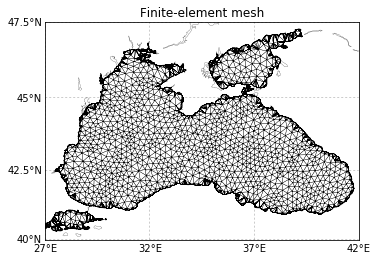

In [9]:
fig = plt.figure()
ax = plt.subplot(111)
m.ax = ax
mesh2d.add_to_plot(m, linewidth=0.25, color='k')
m.drawmeridians(np.linspace(Param.xori, Param.xend, 4), labels=[0, 0, 0, 1], linewidth=0.2)
m.drawparallels(np.linspace(Param.yori, Param.yend, 4), labels=[1, 0, 0, 0], linewidth=0.2)
m.drawcoastlines(linewidth=0.2, zorder=3)
plt.title("Finite-element mesh")
# plt.savefig(os.path.join(figdir, 'mesh.png'))
plt.show()
plt.close()



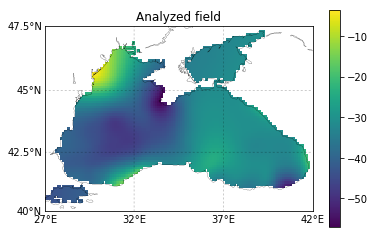

In [10]:


fig = plt.figure()
ax = plt.subplot(111)
m.ax = ax
FieldPlot = analysis2d.add_to_plot(field='analysis', m=m)
m.drawmeridians(np.linspace(Param.xori, Param.xend, 4), labels=[0, 0, 0, 1], linewidth=0.2)
m.drawparallels(np.linspace(Param.yori, Param.yend, 4), labels=[1, 0, 0, 0], linewidth=0.2)
m.drawcoastlines(linewidth=0.2, zorder=3)
plt.colorbar(FieldPlot)
plt.title('Analyzed field')
# plt.savefig(os.path.join(figdir, 'analysis.png'))
plt.show()
plt.close()

